In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

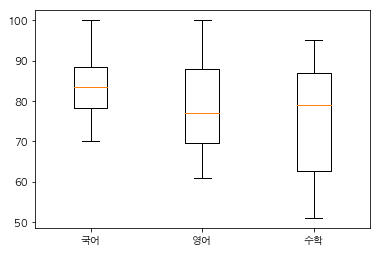

In [4]:
import random
kor = [random.randint(70,100) for i in range(0,30)]
eng = [random.randint(60,100) for i in range(0,30)]
math = [random.randint(50,100) for i in range(0,30)]
plt.boxplot([kor,eng,math],
           labels = ['국어','영어','수학'],
           )
plt.show()